<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In [1]:
#!pip install tensorflow 
import tensorflow as tf
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.utils import img_to_array
from keras_preprocessing.image import load_img
from keras.utils import np_utils

<h4 style="color:purple">Load the dataset</h4>

In [3]:
back = os.listdir("C:\\Users\\KARAN\\Desktop\\mysorepak\\dataset\\back_arr")
exit = os.listdir("C:\\Users\\KARAN\\Desktop\\mysorepak\\dataset\\exit_button")
home = os.listdir("C:\\Users\\KARAN\\Desktop\\mysorepak\\dataset\\home_button")
share = os.listdir("C:\\Users\\KARAN\\Desktop\\mysorepak\\dataset\\share_button")
menu = os.listdir("C:\\Users\\KARAN\\Desktop\\mysorepak\\dataset\\menu_button")


In [4]:
len(exit)


129

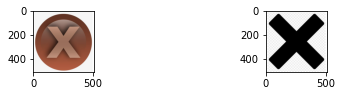

In [24]:

try:
    plt.figure(figsize = (26,16))
    for i in range(2):
        plt.subplot(13, 8, i+1)
        img = cv2.imread("C:\\Users\\KARAN\\Desktop\\mysorepak\\dataset\\exit_button" + "/" + exit[i])
        plt.imshow(img)
        plt.tight_layout()
    plt.show()
except:
    None


In [6]:
data = []
labels = []
for img in back:
    try:
        img_read = plt.imread("C:\\Users\\KARAN\\Desktop\\mysorepak\\dataset\\back_arr" + "/" + img)
        img_resize = cv2.resize(img_read, (206, 206))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in exit:
    try:
        img_read = plt.imread("C:\\Users\\KARAN\\Desktop\\mysorepak\\dataset\\exit_button" + "/" + img)
        img_resize = cv2.resize(img_read, (206, 206))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(2)
    except:
        None
        
for img in menu:
    try:
        img_read = plt.imread("C:\\Users\\KARAN\\Desktop\\mysorepak\\dataset\\menu_button" + "/" + img)
        img_resize = cv2.resize(img_read, (206, 206))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(3)
    except:
        None

for img in home:
    try:
        img_read = plt.imread("C:\\Users\\KARAN\\Desktop\\mysorepak\\dataset\\home_button" + "/" + img)
        img_resize = cv2.resize(img_read, (206, 206))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(4)
    except:
        None
        
for img in share:
    try:
        img_read = plt.imread("C:\\Users\\KARAN\\Desktop\\mysorepak\\dataset\\share_button" + "/" + img)
        img_resize = cv2.resize(img_read, (206, 206))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(5)
    except:
        None

In [7]:
image_data = np.array(data)
labels = np.array(labels)

In [8]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [9]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.1, random_state = 101)

In [11]:
X_train.shape


(456, 206, 206, 3)

In [12]:
X_train

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [13]:
X_test.shape

(51, 206, 206, 3)

In [14]:
y_train.shape

(456,)

In [15]:
y_test.shape

(51,)

In [16]:
classes = ["back","exit","menu","home","share"]

<h4 style="color:purple">Normalizing the training data</h4>

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(206, 206, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
cnn.fit(X_train, y_train, epochs=8)

Epoch 1/8
15/15 [==============================] - 9s 602ms/step - loss: 3.2181 - accuracy: 0.3640
Epoch 2/8
15/15 [==============================] - 8s 505ms/step - loss: 0.7263 - accuracy: 0.7237
Epoch 3/8
15/15 [==============================] - 8s 500ms/step - loss: 0.3260 - accuracy: 0.8947
Epoch 4/8
15/15 [==============================] - 8s 538ms/step - loss: 0.1481 - accuracy: 0.9649
Epoch 5/8
15/15 [==============================] - 10s 690ms/step - loss: 0.0783 - accuracy: 0.9803
Epoch 6/8
15/15 [==============================] - 10s 632ms/step - loss: 0.0617 - accuracy: 0.9825
Epoch 7/8
15/15 [==============================] - 8s 541ms/step - loss: 0.0787 - accuracy: 0.9803
Epoch 8/8
15/15 [==============================] - 8s 548ms/step - loss: 0.0444 - accuracy: 0.9912


In [21]:
cnn.evaluate(X_test,y_test)

2/2 [==============================] - 0s 76ms/step - loss: 0.6461 - accuracy: 0.9216


[0.6460682153701782, 0.9215686321258545]